# 版权声明

版权 © 2023 斯坦福大厨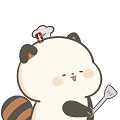，华中科技大学微纳材料设计与制造研究中心的科研工作者。

恭喜您已经发现了这份神奇的计算材料学课件！这份课件是我在熬夜吃掉不计其数的披萨和咖啡后创作出来的，配套的教材是由单斌、陈征征、陈蓉合著的《计算材料学-从算法原理到代码实现》。学习资料合集您可以在这个网址找到：[www.materialssimulation.com/book](www.materialssimulation.com/book)。希望它能帮您在计算材料学的道路上摔得不那么痛。

就像您尊重那些一边烘焙披萨一边写代码的大厨一样，当您使用这份课件时，请：

- 记得告诉大家这份课件是斯坦福大厨写的，并且他在华中科技大学微纳中心工作
- 别用它去赚大钱，这个课件是用来学习的，不是用来买披萨的
- 保持开放共享的精神

如果你有关于计算材料学的想法，或者你只是想和我讨论最好吃的披萨口味，欢迎通过邮件 bshan@mail.hust.edu.cn 联系我。
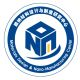

## Particle 类

这个`Particle`类是一个用于表示粒子的类。以下是各部分的详细说明：

1. `__init__(self, position)`: 这是类的构造函数，用于初始化Particle类的实例。它接受一个位置参数，并将其转换为一个NumPy数组，然后存储在名为`_position`的私有属性中。

2. `__str__(self)`: 这是类的字符串方法，当我们尝试将Particle对象转换为字符串时，会调用它。此方法将返回一个字符串，其中包含粒子的位置信息。

3. `@property`: 这是Python的装饰器之一，它将紧随其后的方法定义为获取相应属性的函数。在这个例子中，`position`方法返回私有属性`_position`的值，因此，当你尝试访问`.position`时，实际上调用了这个方法。

4. `@position.setter`: 这是另一个装饰器，它将紧随其后的方法定义为设置相应属性的函数。在这个例子中，`position`方法接受一个值，将其转换为NumPy数组，然后将这个数组赋值给`_position`。因此，当你尝试设置`.position`的值时，实际上调用了这个方法。

总的来说，这个`Particle`类提供了一种封装粒子位置信息的方法，并且提供了获取和设置位置信息的接口。其中，位置信息被保存为NumPy数组，以便于进行各种数值计算。

In [1]:
import numpy as np

class Particle:
    def __init__(self, position):
        self._position = np.array(position,dtype=float)

    def __str__(self):
        return f"particle position = {self.position}"

    @property
    def position(self):
        return self._position

    @position.setter
    def position(self, value):
        self._position = np.array(value)


In [2]:
p1 = Particle(position=(1.0, 1.0))
print(p1)

p2 = Particle(position=(9.0, -1.0))
print(p2)

particle position = [1. 1.]
particle position = [ 9. -1.]


## Box 类

这个`Box`类是用于表示一个盒子的类。以下是各部分的详细说明：

1. `__init__(self, lower, upper)`: 这是类的构造函数，用于初始化Box类的实例。它接受两个参数，`lower`和`upper`，分别表示盒子的下界和上界。同时，计算这两个值之间的差并将其赋值给`length`属性，表示盒子的长度。

2. `__str__(self)`: 这是类的字符串方法，当我们尝试将Box对象转换为字符串时，会调用它。此方法将返回一个字符串，其中包含盒子的维度（即长度）信息。

简单总结，这个`Box`类提供了一种表示盒子的方法，通过盒子的上界和下界来定义盒子，并且还可以获得盒子的长度。


In [9]:
class Box:
    def __init__(self, lower, upper):
        self.lower = np.array(lower,dtype=float)
        self.upper = upper
        self.length = upper - lower

    def __str__(self):
        return f"box dimension {self.length}"

In [10]:
# Define a box
box = Box(np.array([0.0, 0.0]), np.array([10.0, 10.0]))
print(box)

box dimension [10. 10.]


## BoundaryCondition 类

这个`BoundaryCondition`类是一个用于表示边界条件的抽象基类，其中定义了两个方法，`apply`和`displacement`，但这两个方法都没有实现，抛出了`NotImplementedError`。

`PeriodicBoundaryCondition`类继承自`BoundaryCondition`类，实现了周期性边界条件。

1. `apply(self, particles: List[Particle], box: Box) -> None`: 这个方法将周期性边界条件应用到系统中的所有粒子上。它接受两个参数：一个是粒子的列表，另一个是表示系统边界的`Box`对象。对于粒子列表中的每一个粒子，此方法会更新其位置，使其符合周期性边界条件。具体操作是，将粒子位置减去盒子的下界，然后对盒子的长度取模，最后再加上盒子的下界。

2. `displacement(self, position1: np.ndarray, position2: np.ndarray, box: Box) -> np.ndarray`: 这个方法计算在周期性系统中，两个位置之间的最短位移矢量。它接受三个参数：第一个和第二个是两个粒子的位置，第三个是表示系统边界的`Box`对象。方法首先计算两个位置的差，然后减去这个差和盒子长度的商（四舍五入到最近的整数）与盒子长度的乘积，最后返回这个值，这就是考虑了周期性边界条件的位移短矢量。

简单来说，`PeriodicBoundaryCondition`类提供了一种在周期性系统中，处理粒子位置和计算位置间位移的方法。

In [11]:
from typing import List

class BoundaryCondition:
    """Abstract base class for boundary conditions."""

    def apply(self, particles: List[Particle], box: Box) -> None:
        raise NotImplementedError

    def displacement(self, position1: np.ndarray, position2: np.ndarray, box: Box) -> np.ndarray:
        raise NotImplementedError


class PeriodicBoundaryCondition(BoundaryCondition):
    """Implements periodic boundary conditions."""

    def apply(self, particles: List[Particle], box: Box)-> None:
        """
        Applies periodic boundary conditions to all particles in the system.

        Parameters
        ----------
        particles : List[Particle]
            List of all Particle instances in the system.
        box : Box
            The Box instance defining the boundaries of the system.

        Returns
        -------
        None

        Notes
        -----
        This method updates the positions of particles in the system
        such that they adhere to the periodic boundary conditions.
        """
        for p in particles:
            p.position = (p.position - box.lower) % box.length + box.lower


    def displacement(self, position1: np.ndarray, position2: np.ndarray, box: Box) -> np.ndarray:
        """
        Computes the shortest displacement vector between two positions in a periodic system.

        Parameters
        ----------
        position1 : np.array
            Position of the first particle.
        position2 : np.array
            Position of the second particle.
        box : Box
            The box object representing the system's boundary.

        Returns
        -------
        np.array
            The displacement vector from position2 to position1 taking into account periodic boundary conditions.
        """
        dr = position1 - position2
        dr = dr - np.rint(dr / box.length) * box.length
        return dr

In [14]:
particles = [p1, p2]
boundary_condition = PeriodicBoundaryCondition()

# output particles before applying boundary condition
print('==== Before ====')
for particle in particles:
    print(particle)

print('==== After ====')
# output particles after applying boundary condition
boundary_condition.apply(particles, box)
for particle in particles:
    print(particle)

print('==== Displacement ====')
print('displacement:',boundary_condition.displacement(p1.position, p2.position, box))

==== Before ====
particle position = [1. 1.]
particle position = [9. 9.]
==== After ====
particle position = [1. 1.]
particle position = [9. 9.]
==== Displacement ====
displacement: [2. 2.]
